# Installation

In [1]:
!pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.2 MB/s eta 0:00:00


# Importing the libraries

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [3]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast)

In [4]:
BATCH_SIZE=16


# Data Preperation

In [5]:

!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bitext/training-dataset-for-chatbotsvirtual-assistants
!unzip "/content/training-dataset-for-chatbotsvirtual-assistants.zip" -d "/content/dataset/"

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/bitext/training-dataset-for-chatbotsvirtual-assistants
License(s): copyright-authors
  0% 0.00/1.16M [00:00<?, ?B/s]
100% 1.16M/1.16M [00:00<00:00, 89.6MB/s]
Archive:  /content/training-dataset-for-chatbotsvirtual-assistants.zip
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.xlsx  
  inflating: /content/dataset/20000-Utterances

In [6]:

dataset=load_dataset("csv",
                       data_files="/content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")


Generating train split: 0 examples [00:00, ? examples/s]

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent'],
        num_rows: 21534
    })
})

In [8]:
dataset['train'][0]


{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 'create_account'}

In [9]:
intents=list(set(dataset['train']['intent']))
dict_intents={intents[i]: i for i in range(len(intents))}
print(dict_intents)
print(len(intents))

{'cancel_order': 0, 'payment_issue': 1, 'change_shipping_address': 2, 'track_order': 3, 'place_order': 4, 'delete_account': 5, 'check_refund_policy': 6, 'switch_account': 7, 'edit_account': 8, 'contact_customer_service': 9, 'change_order': 10, 'contact_human_agent': 11, 'check_cancellation_fee': 12, 'get_refund': 13, 'track_refund': 14, 'complaint': 15, 'review': 16, 'recover_password': 17, 'create_account': 18, 'delivery_period': 19, 'check_payment_methods': 20, 'get_invoice': 21, 'delivery_options': 22, 'registration_problems': 23, 'check_invoices': 24, 'newsletter_subscription': 25, 'set_up_shipping_address': 26}
27


In [10]:

def preprocess(dataset):
  return {'utterance':dataset['utterance'],
          'intent':dict_intents[dataset['intent']]}

In [11]:
prep_dataset=dataset.map(preprocess)


Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [13]:
prep_dataset['train'][0]


{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 18}

In [14]:
model_id="microsoft/deberta-base"
tokenizer = DebertaTokenizerFast.from_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

In [15]:
def tokenizer_function(dataset):
  return tokenizer(dataset["utterance"],)

In [16]:
tokenized_dataset=prep_dataset.map(tokenizer_function)


Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [17]:
tokenized_dataset


DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21534
    })
})

In [18]:
tokenized_dataset['train'][0]


{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 18,
 'input_ids': [1,
  100,
  218,
  75,
  33,
  41,
  804,
  1316,
  6,
  99,
  109,
  38,
  33,
  7,
  109,
  7,
  5124,
  116,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [19]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")


In [20]:
tf_dataset = tokenized_dataset["train"].to_tf_dataset(
    columns=['input_ids','attention_mask', 'intent'],
    shuffle=True,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)

In [21]:
def swap_positions(dataset):
  return {'input_ids':dataset['input_ids'],
          'attention_mask':dataset['attention_mask'],},dataset['intent']

In [22]:
tf_dataset=tf_dataset.map(swap_positions)


In [23]:

train_dataset=tf_dataset.take(int(0.9*len(tf_dataset)))
val_dataset=tf_dataset.skip(int(0.9*len(tf_dataset)))

In [24]:

for i in val_dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(16, 23), dtype=int64, numpy=
array([[    1,  7424,  1717,  1394,    41,  2936,   141,    38,    64,
         1649,   127, 21782,   116,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    1,   100,   236,     7,   216,   114,   127, 11212,   330,
         1580,    16,    66,    13,  2996,     2,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    1,  6968,  2025,    75,  1903,     6,    38,   240,   244,
         2686,    19,    10,  1050,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    1,   100,   240,   335,     6,    99,   109,    38,    33,
            7,   109,     7,  1994,    19, 19458,  7737,   116,     2,
            0,     0,     0,     0,     0],
       [    1,   100,   120,    41,  5849,    77,    38,  2120,     7,
          146,    10,  3207,    13,   127,   804,   645,     6,    99,
           64,    38,   109,   116,     2],
       

# Modeling


# Based on TFDebertaForSequenceClassification


In [25]:
model=TFDebertaForSequenceClassification.from_pretrained(model_id,num_labels=len(intents))
model.summary()

tf_model.h5:   0%|          | 0.00/555M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['cls_dropout', 'pooler', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLaye  multiple                  138601728 
 r)                                                              
                                                                 
 pooler (TFDebertaContextPo  multiple                  590592    
 oler)                                                           
                                                                 
 cls_dropout (TFDebertaStab  multiple                  0         
 leDropout)                                                      
                                                                 
 classifier (Dense)          multiple                  20763     
                                                                 
Total params: 139213083 (531.06 MB)
Trainable params: 139213083 (531.06 MB)
Non-trainable para

# Training


In [26]:

num_epochs = 2
batches_per_epoch = len(tokenized_dataset["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * num_epochs)


In [27]:
optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps)


In [28]:

model.compile(optimizer=optimizer,
    metrics=["accuracy"])

In [29]:

history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,)


Epoch 1/5


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


1211/1211 [==============================] - 345s 215ms/step - loss: 0.2350 - accuracy: 0.9486 - val_loss: 0.0050 - val_accuracy: 0.9995
Epoch 2/5
1211/1211 [==============================] - 266s 219ms/step - loss: 0.0078 - accuracy: 0.9989 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 3/5
1211/1211 [==============================] - 257s 212ms/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/5
1211/1211 [==============================] - 244s 202ms/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/5
1211/1211 [==============================] - 266s 220ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0013 - val_accuracy: 1.0000


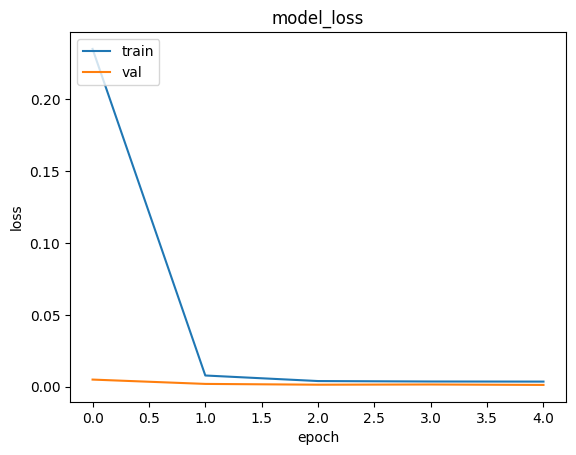

In [30]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


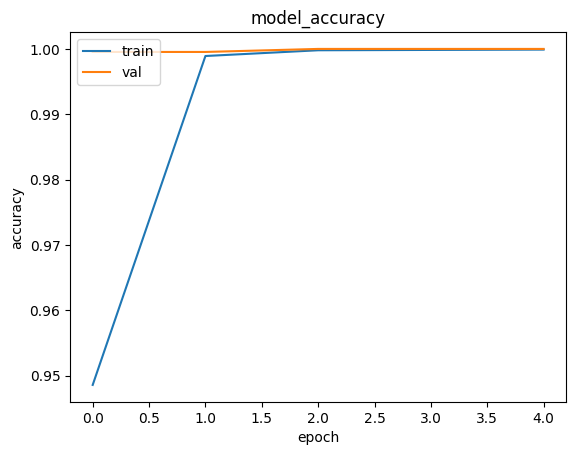

In [31]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Evaluating the model

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Initialize lists for storing predicted labels and true labels
predicted = []
labels = []

In [33]:
# Iterate over the validation dataset and collect predictions and labels
for input, label in val_dataset:
    predicted.append(model(**input).logits)
    labels.append(label.numpy())

# Flatten the labels and predicted values
pred = np.concatenate([np.array(labels[:-1]).flatten(), np.array(labels[-1]).flatten()])
lab = np.concatenate([np.argmax(predicted[:-1], axis=-1).flatten(), np.argmax(predicted[-1], axis=-1).flatten()])


Confusion Matrix:
 [[  4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0 448   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0 107   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  95   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0   0
   

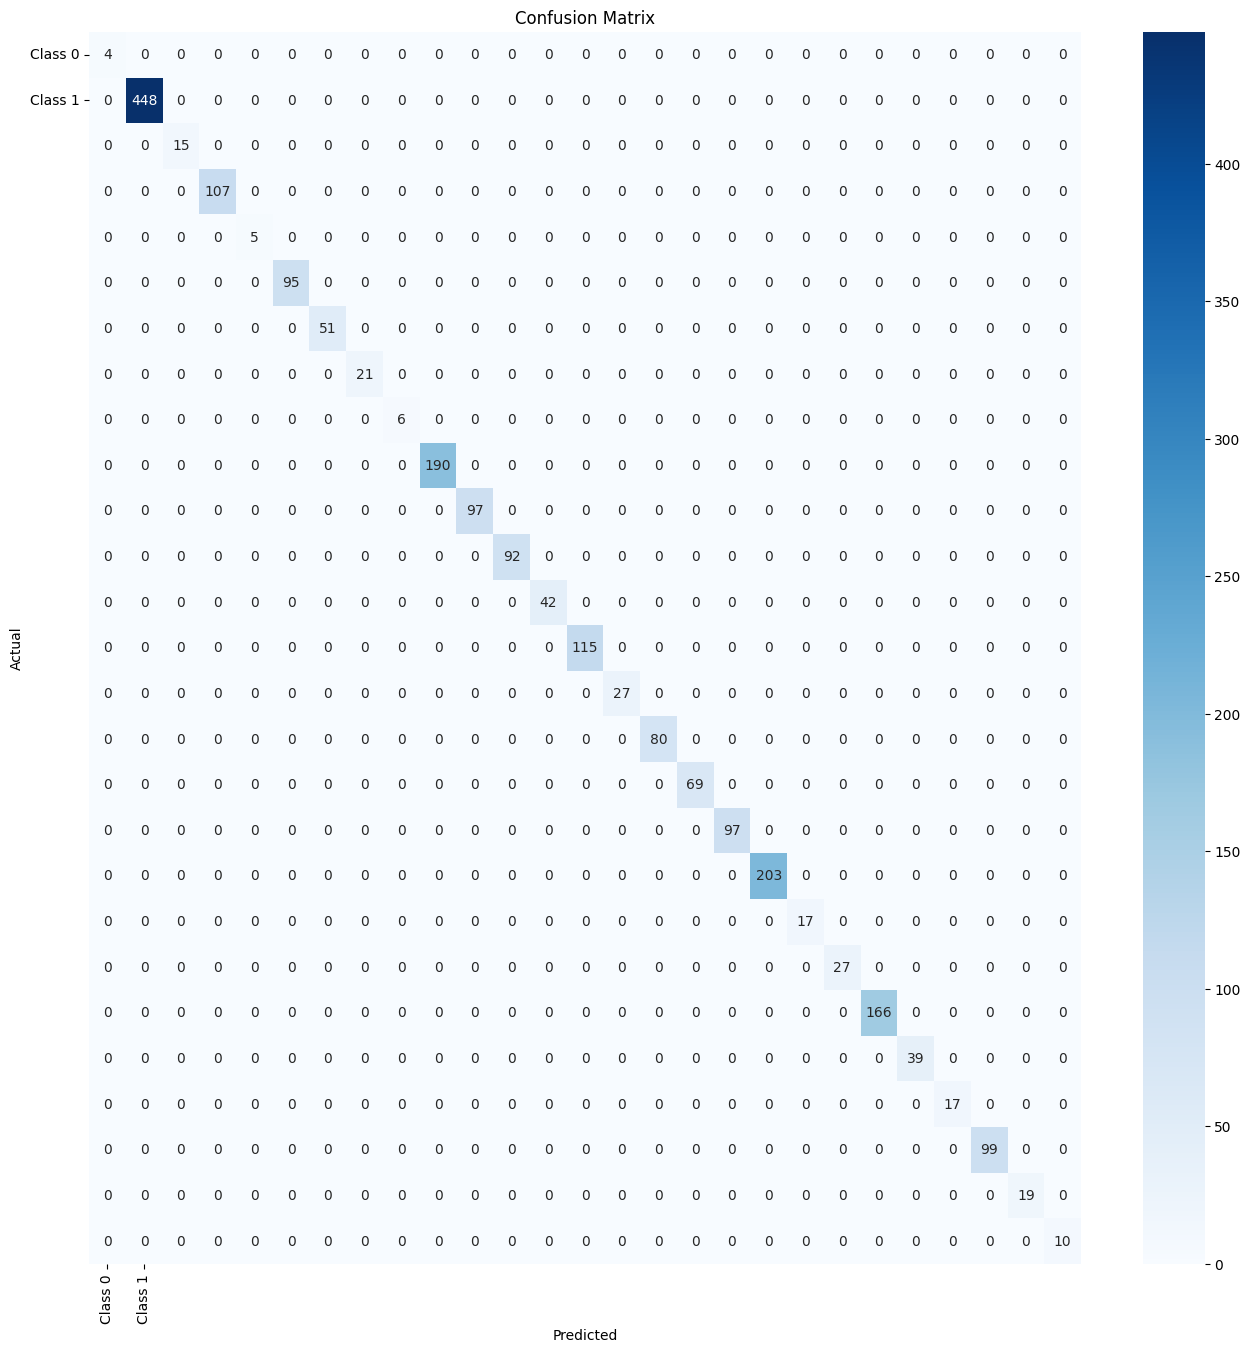

Normalized Confusion Matrix:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

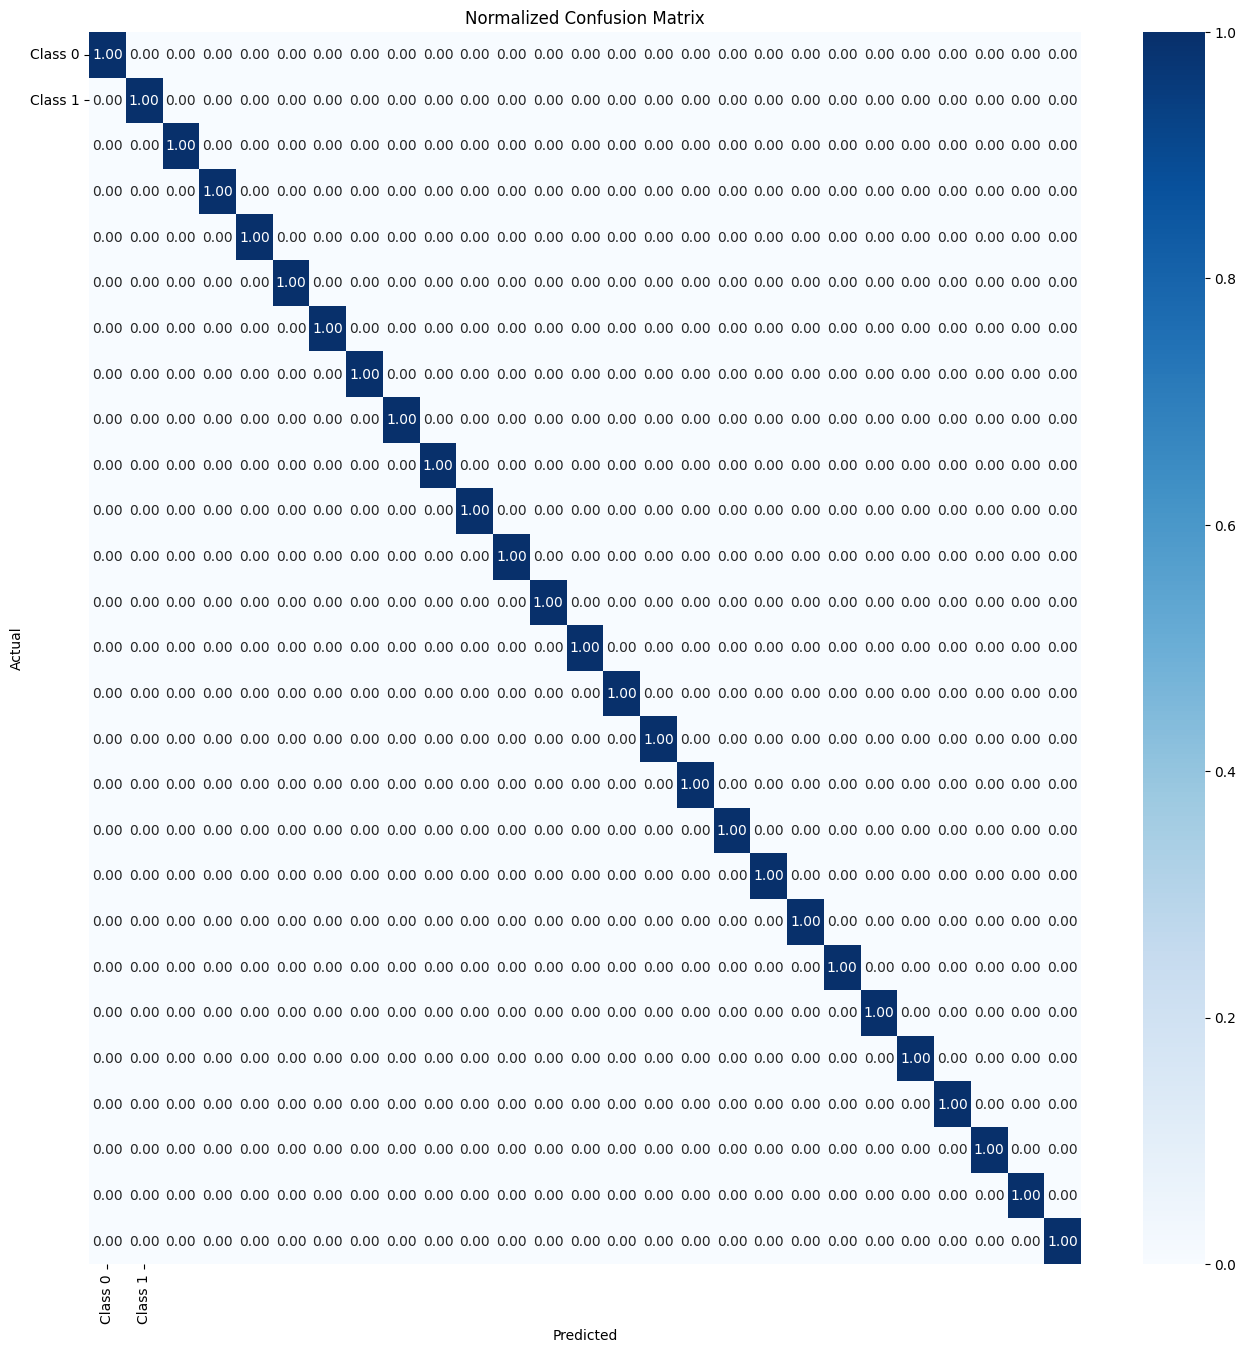

In [34]:
# Confusion Matrix
cm = confusion_matrix(lab, pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:\n", cm_normalized)

# Plot the normalized confusion matrix
plt.figure(figsize=(16, 16))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Normalized Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, F1 Score for multiclass
precision = precision_score(pred, lab, average='weighted')  # Use 'micro', 'macro', or 'weighted' based on your preference
recall = recall_score(pred, lab, average='weighted')
f1 = f1_score(pred, lab, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, F1 Score for each class
precision_per_class = precision_score(pred, lab, average=None)  # Precision for each class
recall_per_class = recall_score(pred, lab, average=None)  # Recall for each class
f1_per_class = f1_score(pred, lab, average=None)  # F1 Score for each class

# Print the metrics for each class
for i in range(len(precision_per_class)):
    print(f"Class {i}:")
    print(f"  Precision: {precision_per_class[i]:.4f}")
    print(f"  Recall: {recall_per_class[i]:.4f}")
    print(f"  F1 Score: {f1_per_class[i]:.4f}")
    print()


Class 0:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 1:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 2:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 3:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 4:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 5:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 6:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 7:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 8:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 9:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 10:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 11:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 12:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 13:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class 14:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Class

# Testing

In [38]:

inputs = tokenizer(["Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change"
                    ], padding=True,return_tensors="tf")

logits = model(**inputs).logits
outputs=tf.argmax(logits,axis=-1).numpy()

In [40]:
print(outputs)


[18  8 20 10]


In [41]:
reverse_dict_intents={i:intents[i] for i in range(len(intents))}
print(reverse_dict_intents)

{0: 'cancel_order', 1: 'payment_issue', 2: 'change_shipping_address', 3: 'track_order', 4: 'place_order', 5: 'delete_account', 6: 'check_refund_policy', 7: 'switch_account', 8: 'edit_account', 9: 'contact_customer_service', 10: 'change_order', 11: 'contact_human_agent', 12: 'check_cancellation_fee', 13: 'get_refund', 14: 'track_refund', 15: 'complaint', 16: 'review', 17: 'recover_password', 18: 'create_account', 19: 'delivery_period', 20: 'check_payment_methods', 21: 'get_invoice', 22: 'delivery_options', 23: 'registration_problems', 24: 'check_invoices', 25: 'newsletter_subscription', 26: 'set_up_shipping_address'}


In [42]:
for i in outputs:
  print(reverse_dict_intents[i])

create_account
edit_account
check_payment_methods
change_order
